In [21]:
import os
import shutil

import yaml
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# Make the plots look pretty
matplotlib.rc('font',size=13)
matplotlib.rc('legend', numpoints=1)
matplotlib.rc('image', cmap='inferno')
matplotlib.rc('image', interpolation='none')
import galsim
from astropy.table import Table as ApTable

from lsst.meas.deblender import display

import utils

In [31]:
# Load the files
filepath = os.path.join(os.path.abspath("."), "psf_matched_sim")
blend = 0

_images = np.load(os.path.join(filepath, "images_{0}.npz".format(blend)))
filters = _images["filters"]
images = _images["images"]
_psfs = np.load(os.path.join(filepath, "psfs.npz"))
_filters = _psfs["filters"]
if np.all(_filters != filters):
    raise Exception("Filters indices did not match")
psfs = _psfs["psfs"]
catalog = ApTable.read(os.path.join(filepath, "true_catalog_{0}.fits".format(blend)))

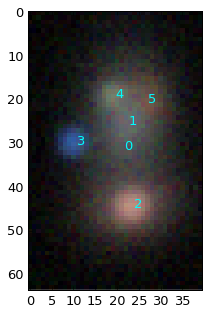

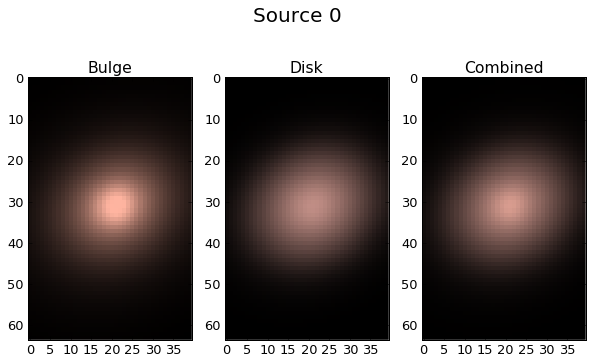

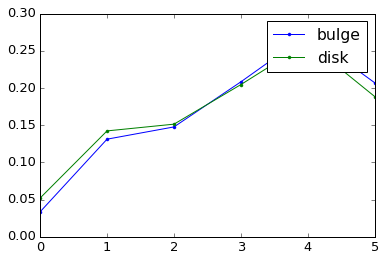

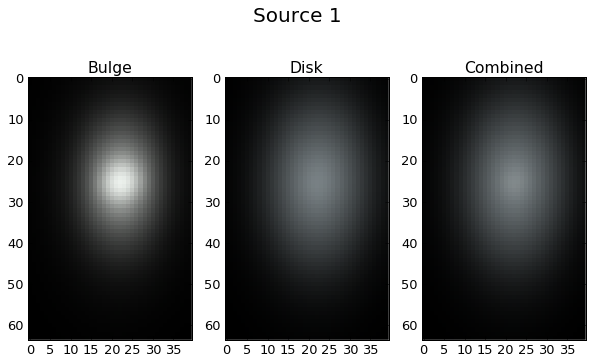

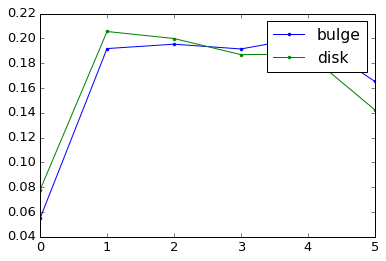

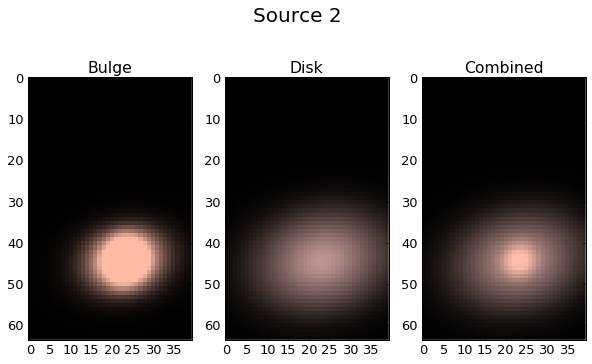

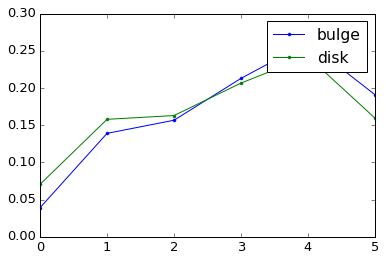

skipping stellar source #3


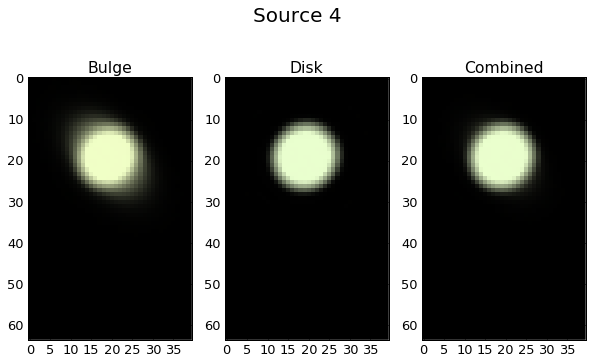

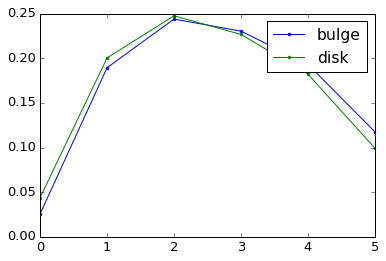

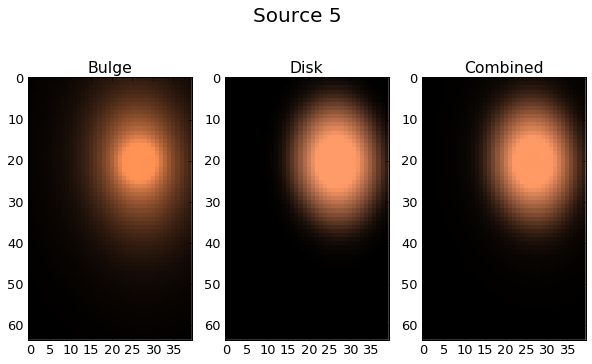

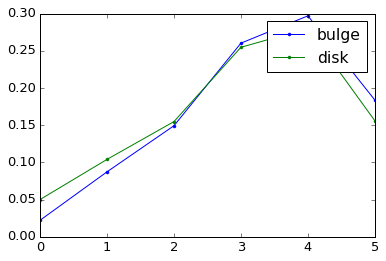

In [32]:
# Display the images
src_list = np.unique(catalog["index"])
display.plotColorImage(images, show=False)
for n,src_id in enumerate(src_list):
    src = catalog[catalog["index"]==src_id][0]
    plt.text(src["x"], src["y"], str(n), color="cyan")
plt.show()

components = [c.strip() for c in catalog["component"]]
bidx = np.array([c=="bulge" for c in components])
didx = np.array([c=="disk" for c in components])
for src in src_list:
    sidx = catalog["index"]==src
    idx = sidx&bidx
    matches = np.sum(idx)
    if matches == 1:
        bulge = []
        disk = []
        for f in filters:
            bulge.append(catalog["intensity_"+f][sidx&bidx][0])
            disk.append(catalog["intensity_"+f][sidx&didx][0])
        bulge = np.array(bulge)
        disk = np.array(disk)
        fig = plt.figure(figsize=(10, 6))
        fig.suptitle("Source {0}".format(src), size=20)
        ax1 = fig.add_subplot(1,3,1)
        ax1.set_title("Bulge")
        ax2 = fig.add_subplot(1,3,2)
        ax2.set_title("Disk")
        ax3 = fig.add_subplot(1,3,3)
        ax3.set_title("Combined")
        display.plotColorImage(bulge, show=False, ax=ax1)
        display.plotColorImage(disk, show=False, ax=ax2)
        display.plotColorImage(bulge+disk, show=False, ax=ax3)
        #plt.tight_layout()
        plt.show()
        plt.plot(catalog["sed"][sidx][0], '.-', label=catalog["component"][sidx][0])
        plt.plot(catalog["sed"][sidx][1], '.-', label=catalog["component"][sidx][1])
        plt.legend()
        plt.show()
    elif matches == 0:
        if catalog["is_star"][sidx][0] != True:
            raise ValueError("No matches for the current index, but the source is not a star")
        else:
            print("skipping stellar source #{0}".format(src))
    else:
        raise ValueError("Received {0} components for source {1}".format(matches, src))